In [14]:
import pandas as pd 
from fastcore.helpers import load_pickle
from glob import glob 
import matplotlib.pyplot as plt 
plt.style.use(['science', 'nature'])
import dabest
import numpy as np 

In [2]:
results = glob('results/20221117-photoswitch_representation_effects/*.pkl')

In [3]:
len(results)

181

In [4]:
compiled_res = []

for res in results:
    loaded_file = load_pickle(res)
    compiled_res.append({
        'representation': loaded_file['representation'],
        'train_set_size': loaded_file['train_set_size'],
        'acc': loaded_file['cm'].ACC_Macro,
        'f1_macro': loaded_file['cm'].F1_Macro,
        'f1_micro': loaded_file['cm'].F1_Micro,
        'representation': loaded_file['representation'],
        'padding_length': loaded_file['padding_length'] if 'pad' in loaded_file['representation'] else None,
    })

In [5]:
compiled_res = pd.DataFrame(compiled_res)

In [6]:
compiled_res.groupby('representation').agg(['mean', 'std'])

train_set_size                  acc            f1_macro  \
                            mean        std      mean       std      mean   
representation                                                              
fragments              30.000000  20.579830  0.771737  0.028950  0.236558   
fragments-one-hot      30.000000  20.579830  0.748603  0.032357  0.165984   
pad-3                  41.111111  16.865481  0.759436  0.029469  0.000000   
pad-4                  50.000000   0.000000  0.773148  0.010652  0.000000   
pad-4pad-5             31.176471  20.579830  0.751774  0.031126  0.000000   
pad-5                  50.000000   0.000000  0.768519  0.013474  0.000000   
pad-6                  50.000000   0.000000  0.761905  0.018261  0.000000   
selfies                28.000000  20.416711  0.747496  0.027528  0.006737   
selfies-one-hot        30.000000  20.579830  0.725088  0.036365  0.000000   

                             f1_micro           padding_length       
                        std      mean       std           mean  std  
representation                                                       
fragments          0.076487  0.429343  0.072375            NaN  NaN  
fragments-one-hot  0.071208  0.371508  0.080892            NaN  NaN  
pad-3              0.000000  0.000000  0.000000            3.0  0.0  
pad-4              0.000000  0.000000  0.000000            4.0  0.0  
pad-4pad-5         0.000000  0.000000  0.000000            5.0  0.0  
pad-5              0.000000  0.000000  0.000000            5.0  0.0  
pad-6              0.000000  0.000000  0.000000            6.0  0.0  
selfies            0.030129  0.014474  0.064728            NaN  NaN  
selfies-one-hot    0.000000  0.000000  0.000000            NaN  NaN

In [23]:
acc_selfies = compiled_res[compiled_res['representation'] == 'selfies']['acc']

acc_fragments = compiled_res[compiled_res['representation'] == 'fragments']['acc']

acc_fragments_one_hot = compiled_res[compiled_res['representation'] == 'fragments-one-hot']['acc']

acc_pad3 = compiled_res[compiled_res['representation'] == 'pad-3']['acc']
acc_pad4 = compiled_res[compiled_res['representation'] == 'pad-4']['acc']
acc_pad5 = compiled_res[compiled_res['representation'] == 'pad-5']['acc']
acc_pad6 = compiled_res[compiled_res['representation'] == 'pad-6']['acc']

acc_selfies_one_hot = compiled_res[compiled_res['representation'] == 'selfies-one-hot']['acc']

In [29]:
dabest_frame = pd.DataFrame(
    {
        'selfies': acc_selfies,
        'fragments': acc_fragments,
        'fragments-one-hot': acc_fragments_one_hot,
        'selfies-one-hot': acc_selfies_one_hot,
        'pad-3': acc_pad3,
        'pad-4': acc_pad5,
        'pad-5': acc_pad5,
        'pad-6': acc_pad6,
        'selfies-one-hot': acc_selfies_one_hot,
    }
)

In [30]:
dabest_frame

,selfies,fragments,fragments-one-hot,selfies-one-hot,pad-3,pad-4,pad-5,pad-6
1,0.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.807059,NaN,NaN,NaN,NaN,NaN,NaN
4,0.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.666667,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
176,NaN,NaN,NaN,NaN,0.750000,NaN,NaN,NaN
177,NaN,NaN,NaN,0.75,NaN,NaN,NaN,NaN
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777778
179,NaN,NaN,NaN,NaN,NaN,0.777778,0.777778,NaN


In [35]:
dabest_e = dabest.load(dabest_frame, idx=("selfies", "fragments", "fragments-one-hot", "selfies-one-hot", "pad-3", "pad-4"), paired=False)

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


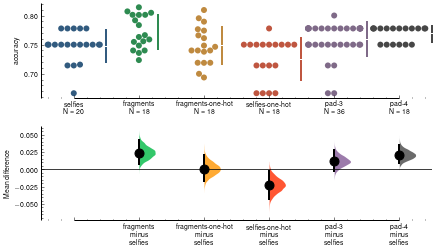

In [38]:
fig, ax = plt.subplots(1,1, figsize=(7, 4))
dabest_e.mean_diff.plot(ax=ax, swarm_label='accuracy' )
fig.savefig('representation_effects.pdf', bbox_inches='tight')